## PHASE ONE PROJECT: Analysis of Movie Performance Over Time

# Introduction
In the realm of entertainment innovation, Microsoft is on the verge of establishing a pioneering movie studio. As the designated analyst for this pivotal initiative, the goal is to decipher the intricate dynamics of successful contemporary films. Armed with comprehensive data encompassing movie titles, revenue metrics, studio affiliations, runtimes, genres, and audience ratings, the analysis aims to distill actionable insights. These findings will serve as a strategic compass, empowering Microsoft's movie studio to produce content that resonates with audiences and maximizes box office success. This exploration is a proactive step towards seamlessly integrating Microsoft into the dynamic realm of original content creation.
# Explain the real-world problem the project aims to solve.
This project addresses Microsoft's entry into original content creation within the film industry, focusing on establishing a successful movie studio. The real-world problem involves deciphering the key factors contributing to the success of contemporary films. By analyzing data on movie titles, revenue metrics, studio affiliations, runtimes, genres, and audience ratings, the goal is to provide actionable insights. The project aims to empower Microsoft with strategic knowledge, enabling informed decisions and a distinctive presence in the dynamic realm of original content creation.
# Identify stakeholders and how they would use the project.
Stakeholders in this project include Microsoft executives, creative teams involved in film production, and marketing teams tasked with promoting the studio's content. Microsoft executives would leverage the project to make informed decisions on the types of films to produce, aligning with market trends. Creative teams would utilize the insights to tailor their film concepts to genres and characteristics that resonate with audiences, increasing the likelihood of success. Marketing teams would benefit by understanding the preferences and trends that drive box office success, allowing them to develop targeted promotional strategies for the studio's films.




# Explaining the data set 
The dataset for this analysis comprises two key sources. The first is a CSV file containing information on movie titles, domestic gross, foreign gross, studio affiliations, and release years. This dataset offers insights into the financial performance and distribution of films over time. The second source is an SQL database providing details on movie runtimes, genres, average ratings, and the number of votes received. This database enriches the analysis with information about the content and audience reception of the films. The combined dataset equips us with a comprehensive view of both the financial and qualitative aspects of movie production, facilitating a holistic exploration of the factors influencing box office success.

# Importing the data sets and the relevant libraries
This ensures that we have the data needed to perform the analysis, as well as the necessary libraries that will aid in performing the mentioned analyses. 

In [131]:
#import the necessary libraries
import csv
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

## Data Analysis per Data Set
The data sets will be analysed in three steps:
1. Individual Analysis of the CSV file
2. Individual Analysis of the DQL Database
3. Joint Analysis of the data sets. 
The purpose of this approach is to ensure that inferences are drawn from the various data sets independently as well as when they are joined. 

## 1. Individual Analysis of the CSV file

### 1.1 Loaidng the Data Set

In [125]:
# Create the needed file path
file_path = './bom.movie_gross.csv'
#Read it into a pandas dataframe
df =pd.read_csv(file_path)
#show the results of the top ten in the list 
print(df.head(10))

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   
5                   The Twilight Saga: Eclipse   Sum.     300500000.0   
6                                   Iron Man 2   Par.     312400000.0   
7                                      Tangled     BV     200800000.0   
8                                Despicable Me   Uni.     251500000.0   
9                     How to Train Your Dragon   P/DW     217600000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
5     398000000  2010  
6     311500000  2010  
7   

### 1.2 Cleaning the Data Set
1.2.1 We will start by dropping the rows that haver missing values for the domestic gross or the foreign gross columns. This ensures that we deleted al the null values, hence giving us a clean data set to work with.

In [139]:
#Drop rows with missing values in the 'domestic gross' and 'foreign gross' features
df.dropna(subset=['domestic_gross', 'foreign_gross'], inplace=True)

# Display the DataFrame after dropping rows
print(df[['title', 'domestic_gross', 'foreign_gross']])

                                                  title  domestic_gross  \
0                                           Toy Story 3     415000000.0   
1                            Alice in Wonderland (2010)     334200000.0   
2           Harry Potter and the Deathly Hallows Part 1     296000000.0   
3                                             Inception     292600000.0   
4                                   Shrek Forever After     238700000.0   
...                                                 ...             ...   
3275                                    I Still See You          1400.0   
3286                              The Catcher Was a Spy        725000.0   
3309                                         Time Freak         10000.0   
3342  Reign of Judges: Title of Liberty - Concept Short         93200.0   
3353            Antonio Lopez 1970: Sex Fashion & Disco         43200.0   

      foreign_gross  
0       652000000.0  
1       691300000.0  
2       664300000.0  
3       535

1.2.2 Let's check if there are abny other columns that have null values

In [140]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the count of null values for each column
print("Null Values in the CSV Data:")
print(null_values)

Null Values in the CSV Data:
title             0
studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


1.2.3 Let's delete the null values in the studio column as shown in the output above

In [146]:
#Drop rows with missing values in the 'studio' features
df.dropna(subset=['studio'], inplace=True)
#save the cleaned data under a new variable name for reference
cleaned_data = df
# Display the DataFrame after dropping rows
print(cleaned_data)
#print(df[['title', 'domestic_gross', 'foreign_gross', 'studio']])

                                                  title        studio  \
0                                           Toy Story 3            BV   
1                            Alice in Wonderland (2010)            BV   
2           Harry Potter and the Deathly Hallows Part 1            WB   
3                                             Inception            WB   
4                                   Shrek Forever After          P/DW   
...                                                 ...           ...   
3275                                    I Still See You           LGF   
3286                              The Catcher Was a Spy           IFC   
3309                                         Time Freak    Grindstone   
3342  Reign of Judges: Title of Liberty - Concept Short  Darin Southa   
3353            Antonio Lopez 1970: Sex Fashion & Disco            FM   

      domestic_gross  foreign_gross  year  
0        415000000.0    652000000.0  2010  
1        334200000.0    691300000.0

1.2.4 Let's see the data types, and make necessary adjustments where necessary. We ideally want the Title and Studio to be Objects, domestic gross and foreign gross to be integers or floats, and year to be am integer. If that's the case, then the data is in a good shape for us to manipulate. 

In [148]:

 #Display data types of each column
print("Data Types of Each Column:")
print(cleaned_data.dtypes)

Data Types of Each Column:
title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


In [180]:
df.duplicated().value_counts()

False    2002
Name: count, dtype: int64

In [181]:
df['domestic_gross'].unique()

array([4.150e+08, 3.342e+08, 2.960e+08, ..., 4.910e+05, 7.250e+05,
       9.320e+04])

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2002 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2002 non-null   object 
 1   studio          2002 non-null   object 
 2   domestic_gross  2002 non-null   float64
 3   foreign_gross   2002 non-null   float64
 4   year            2002 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 93.8+ KB


In [186]:
df.describe()

,domestic_gross,foreign_gross,year
count,2.002000e+03,2.002000e+03,2002.000000
mean,4.571529e+07,7.597967e+07,2013.500000
std,7.640004e+07,1.383001e+08,2.597475
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.655000e+05,4.000000e+06,2011.000000
50%,1.640000e+07,1.960000e+07,2013.000000
75%,5.570000e+07,7.645000e+07,2016.000000
max,7.001000e+08,9.605000e+08,2018.000000


### 1.3 Data Analysis 
Now that we have cleaned the data we can now do the analysis

1.3.1 Let's find the top ten studios based on total gross for the period of time. This forms part of competitor analysis and we can also usae this data later when we want to highlight specific details about the top studios.

In [177]:
cleaned_data = data
# Create a new column 'total_gross' representing the sum of domestic and foreign gross
data['total_gross'] =  pd.to_numeric(data['domestic_gross'], errors='coerce') + pd.to_numeric(data['foreign_gross'], errors='coerce')

# Group by studio and calculate the total gross for each
studio_total_gross = data.groupby('studio')['total_gross'].sum()

# Get the top ten studios
top_ten_studios = studio_total_gross.nlargest(10)

# Print the list of top ten studios based on total gross
print("Top Ten Studios Based on Total Gross:")
print(top_ten_studios)

Top Ten Studios Based on Total Gross:
studio
BV         4.257488e+10
Fox        3.098037e+10
WB         3.079150e+10
Uni.       2.851551e+10
Sony       2.240472e+10
Par.       1.944420e+10
WB (NL)    1.031410e+10
LGF        8.467471e+09
LG/S       5.318924e+09
P/DW       5.076500e+09
Name: total_gross, dtype: float64


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2002 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2002 non-null   object 
 1   studio          2002 non-null   object 
 2   domestic_gross  2002 non-null   float64
 3   foreign_gross   2002 non-null   float64
 4   year            2002 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 93.8+ KB


mean      4.571529e+07
median    1.640000e+07
std       7.640004e+07
Name: domestic_gross, dtype: float64


<Axes: >

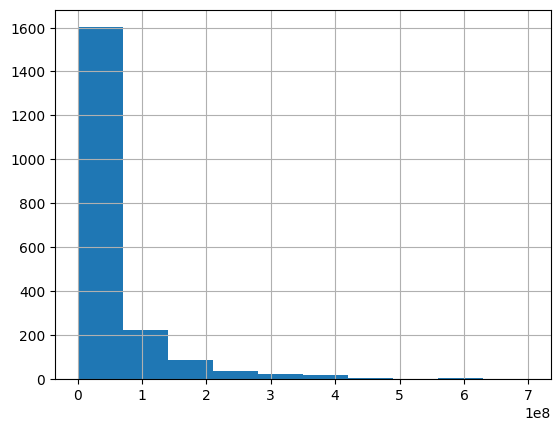

In [184]:
print(df['domestic_gross'].apply(['mean', 'median', 'std']))
df['domestic_gross'].hist()

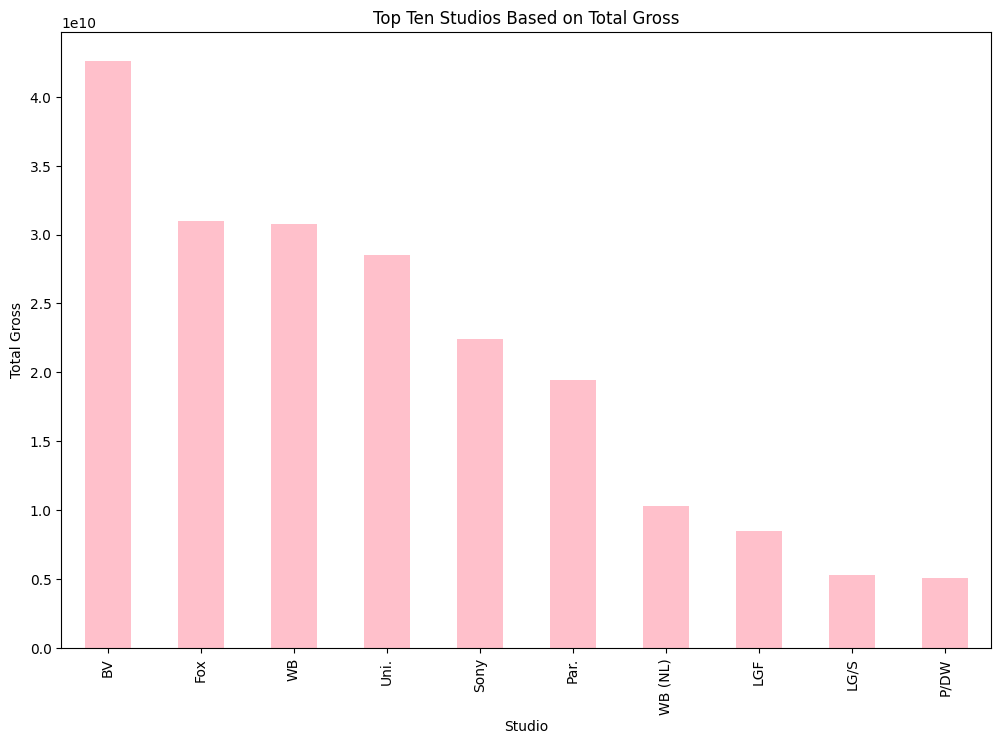

In [168]:
# Plotting a bar chart for the top ten studios
plt.figure(figsize=(12, 8))
top_ten_studios.sort_values(ascending=False).plot(kind='bar', color='pink')
plt.title('Top Ten Studios Based on Total Gross')
plt.xlabel('Studio')
plt.ylabel('Total Gross')
plt.show()

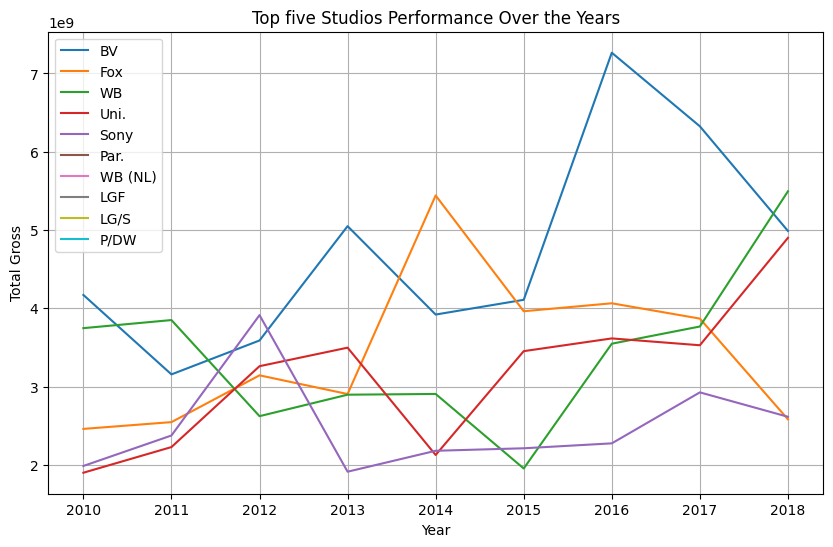

In [172]:
# Group by studio and year, calculate the total gross for each
studio_yearly_gross = data.groupby(['studio', 'year'])['total_gross'].sum().reset_index()

# Get the top five studios
top_five_studios = studio_yearly_gross.groupby('studio')['total_gross'].sum().nlargest(5).index

# Filter data for the top ten studios
top_five_data = studio_yearly_gross[studio_yearly_gross['studio'].isin(top_five_studios)]

# Create a line chart for each studio
plt.figure(figsize=(10, 6))
for studio in top_ten_studios:
    studio_data = top_five_data[top_five_data['studio'] == studio]
    plt.plot(studio_data['year'], studio_data['total_gross'], label=studio)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.title('Top five Studios Performance Over the Years')
plt.legend()
plt.grid(True)
plt.show()

In [173]:
# Calculate the mean total gross for each studio
mean_total_gross_by_studio = studio_yearly_gross.groupby('studio')['total_gross'].mean()

# Display the mean total gross for each studio
print("Mean Total Gross by Studio:")
print(mean_total_gross_by_studio)


Mean Total Gross by Studio:
studio
3D       1.600000e+07
A23      0.000000e+00
A24      8.315317e+07
ADC      0.000000e+00
AF       1.163750e+06
             ...     
XL       0.000000e+00
YFG      0.000000e+00
Yash     3.690431e+07
Zee      1.671000e+06
Zeit.    2.753650e+06
Name: total_gross, Length: 257, dtype: float64


                                            title      studio domestic_gross  \
0                                     Toy Story 3          BV    415000000.0   
1                      Alice in Wonderland (2010)          BV    334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB    296000000.0   
3                                       Inception          WB    292600000.0   
4                             Shrek Forever After        P/DW    238700000.0   
...                                           ...         ...            ...   
3382                                    The Quake       Magn.         6200.0   
3383                  Edward II (2018 re-release)          FM         4800.0   
3384                                     El Pacto        Sony         2500.0   
3385                                     The Swan  Synergetic         2400.0   
3386                            An Actor Prepares       Grav.         1700.0   

     foreign_gross  year   total_gross 

## Introduction 

## Data Understanding

## Data Analysis

In [41]:
from sqlalchemy import create_engine

# Replace 'your_database' and 'your_table' with the actual database and table names
table_name = 'bom'

df = pd.read_csv("bom.movie_gross.csv")

# Connect to the SQL database using SQLAlchemy
engine = create_engine('sqlite:///im.db')  # Replace with your actual database connection string

# Write the DataFrame to the SQL database
df.to_sql(table_name, engine, index=False, if_exists='replace')  # Change 'replace' to 'append' if needed

# Verify the data in the SQL table
sql_query = f'SELECT * FROM {table_name}'
df_from_sql = pd.read_sql(sql_query, engine)

# Display the DataFrame from SQL
print(df_from_sql)


                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [42]:
first_query = """ 
SELECT mb.*, bom.*
FROM movie_basics mb
INNER JOIN bom
ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year;
"""

# Use the line below to check your query's output
pd.read_sql(first_query, conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,None,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...,...,...,...
1886,tt8878922,They Shall Not Grow Old,They Shall Not Grow Old,2018,47.0,"Biography,Documentary,History",They Shall Not Grow Old,WB,18000000.0,None,2018
1887,tt9042690,The Negotiation,The Negotiation,2018,89.0,"Documentary,History,War",The Negotiation,CJ,111000.0,None,2018
1888,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",Last Letter,CL,181000.0,None,2018
1889,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018


In [13]:
 # Delete rows with NULL in "foreign_gross" column in "bom" table
delete_query = """
DELETE FROM bom
WHERE foreign_gross IS NULL;
"""
conn.execute(delete_query)
conn.commit()


In [14]:
 # Delete rows with NULL in "foreign_gross" column in "bom" table
delete_query = """
DELETE FROM bom
WHERE domestic_gross IS NULL;
"""
conn.execute(delete_query)
conn.commit()

In [15]:
# Use the line below to check your query's output
pd.read_sql(first_query, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000,2012
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",The Rum Diary,FD,13100000.0,10800000,2011
...,...,...,...,...,...,...,...,...,...,...,...
1274,tt7785302,Spotlight,Spotlight,2015,99.0,Drama,Spotlight,ORF,45100000.0,53200000,2015
1275,tt7959026,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",The Mule,WB,103800000.0,68700000,2018
1276,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",Nobody's Fool,Par.,31700000.0,1800000,2018
1277,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,How Long Will I Love U,WGUSA,747000.0,82100000,2018


In [25]:
# Get information about columns in the "movie_ratings" table
columns_query = """
PRAGMA table_info(movie_ratings);
"""

columns_info = pd.read_sql(columns_query, conn)
print(columns_info)


   cid           name     type  notnull dflt_value  pk
0    0       movie_id     TEXT        0       None   0
1    1  averagerating     REAL        0       None   0
2    2       numvotes  INTEGER        0       None   0


In [46]:
# First Query: Combine tables without additional conditions
first_query = """
SELECT mb.*, bom.*, mr.*
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year
LEFT JOIN movie_ratings mr ON mb.primary_title = mr.movie_id;
"""

# Use the line below to check your query's output
cleaned_data = pd.read_sql(first_query, conn)
print(cleaned_data)


       movie_id                    primary_title  \
0     tt0315642                            Wazir   
1     tt0337692                      On the Road   
2     tt0359950  The Secret Life of Walter Mitty   
3     tt0365907      A Walk Among the Tombstones   
4     tt0369610                   Jurassic World   
...         ...                              ...   
1886  tt8878922          They Shall Not Grow Old   
1887  tt9042690                  The Negotiation   
1888  tt9078374                      Last Letter   
1889  tt9151704        Burn the Stage: The Movie   
1890  tt9461382                          Colette   

                       original_title  start_year  runtime_minutes  \
0                               Wazir        2016            103.0   
1                         On the Road        2012            124.0   
2     The Secret Life of Walter Mitty        2013            114.0   
3         A Walk Among the Tombstones        2014            114.0   
4                      Ju

In [47]:
# Display the first few rows of the cleaned_data DataFrame
cleaned_data.head(15)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,movie_id,averagerating,numvotes
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,None,2016,None,None,None
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000,2012,None,None,None
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,None,None,None
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,None,None,None
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015,None,None,None
5,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",The Rum Diary,FD,13100000.0,10800000,2011,None,None,None
6,tt0376479,American Pastoral,American Pastoral,2016,108.0,"Crime,Drama",American Pastoral,LGF,544000.0,None,2016,None,None,None
7,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",The Three Stooges,Fox,44300000.0,10500000,2012,None,None,None
8,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",Tangled,BV,200800000.0,391000000,2010,None,None,None
9,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",John Carter,BV,73100000.0,211100000,2012,None,None,None


In [50]:
# Check for null values in "averagerating" and "numvotes" columns
null_check_query = """
SELECT *
FROM movie_ratings
WHERE averagerating IS NULL OR numvotes IS NULL;
"""

null_check_data = pd.read_sql(null_check_query, conn)
print(null_check_data)


Empty DataFrame
Columns: [movie_id, averagerating, numvotes]
Index: []


In [51]:
# Simplified Query: Join only "movie_basics" and "bom"
simplified_query = """
SELECT mb.*, bom.*
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year;
"""

# Use the line below to check your query's output
simplified_data = pd.read_sql(simplified_query, conn)
print(simplified_data)


       movie_id                    primary_title  \
0     tt0315642                            Wazir   
1     tt0337692                      On the Road   
2     tt0359950  The Secret Life of Walter Mitty   
3     tt0365907      A Walk Among the Tombstones   
4     tt0369610                   Jurassic World   
...         ...                              ...   
1886  tt8878922          They Shall Not Grow Old   
1887  tt9042690                  The Negotiation   
1888  tt9078374                      Last Letter   
1889  tt9151704        Burn the Stage: The Movie   
1890  tt9461382                          Colette   

                       original_title  start_year  runtime_minutes  \
0                               Wazir        2016            103.0   
1                         On the Road        2012            124.0   
2     The Secret Life of Walter Mitty        2013            114.0   
3         A Walk Among the Tombstones        2014            114.0   
4                      Ju

In [103]:
query_x = """
SELECT primary_title, runtime_minutes
FROM movie_basics
WHERE start_year >2013 AND start_year<2018 AND runtime_minutes >0;
"""
pd.read_sql(query_x, conn)

,primary_title,runtime_minutes
0,The Wandering Soap Opera,80.0
1,Joe Finds Grace,83.0
2,Short Time Heroes,45.0
3,Wazir,103.0
4,Rice Girl,95.0
...,...,...
53191,Be 5min. vede,80.0
53192,Bacchanalia,72.0
53193,The War of Godzilla,102.0
53194,Illenau - die Geschichte einer ehemaligen Heil...,84.0


## Practice Section

In [107]:
query_w = """
SELECT genres, averagerating, numvotes
FROM movie_basics
INNER JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id
WHERE numvotes>100 AND averagerating>6.5;
"""
pd.read_sql(query_w, conn)


,genres,averagerating,numvotes
0,Documentary,8.9,559
1,"Biography,Drama,Sport",7.0,1613
2,"Drama,War",7.2,265
3,"Adventure,Animation,Drama",7.0,5494
4,"Biography,Drama,Sport",7.6,326657
...,...,...,...
9949,"Drama,Sport",9.0,1778
9950,Drama,8.6,135
9951,Drama,7.4,710
9952,Drama,7.1,338


In [114]:
query_y = """
SELECT title, domestic_gross, averagerating, numvotes
FROM bom
INNER JOIN movie_basics 
ON bom.title = movie_basics.primary_title OR bom.title = movie_basics.original_title
INNER JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id
WHERE numvotes>100 AND averagerating>6.5 AND domestic_gross >0 
ORDER BY domestic_gross DESC
LIMIT 11
"""
pd.read_sql(query_y,conn)

,title,domestic_gross,averagerating,numvotes
0,Black Panther,700100000.0,7.3,516148
1,Avengers: Infinity War,678800000.0,8.5,670926
2,Jurassic World,652300000.0,7.0,539338
3,Star Wars: The Last Jedi,620200000.0,7.1,462903
4,Incredibles 2,608600000.0,7.7,203510
5,Rogue One: A Star Wars Story,532200000.0,7.8,478592
6,Finding Dory,486300000.0,7.3,213542
7,Avengers: Age of Ultron,459000000.0,7.3,665594
8,The Dark Knight Rises,448100000.0,8.4,1387769
9,The Hunger Games: Catching Fire,424700000.0,7.5,575455


In [53]:
# Inspect data in "movie_basics" and "bom"
basics_bom_query = """
SELECT mb.*, bom.*
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year;
"""

basics_bom_data = pd.read_sql(basics_bom_query, conn)
print(basics_bom_data)


       movie_id                    primary_title  \
0     tt0315642                            Wazir   
1     tt0337692                      On the Road   
2     tt0359950  The Secret Life of Walter Mitty   
3     tt0365907      A Walk Among the Tombstones   
4     tt0369610                   Jurassic World   
...         ...                              ...   
1886  tt8878922          They Shall Not Grow Old   
1887  tt9042690                  The Negotiation   
1888  tt9078374                      Last Letter   
1889  tt9151704        Burn the Stage: The Movie   
1890  tt9461382                          Colette   

                       original_title  start_year  runtime_minutes  \
0                               Wazir        2016            103.0   
1                         On the Road        2012            124.0   
2     The Secret Life of Walter Mitty        2013            114.0   
3         A Walk Among the Tombstones        2014            114.0   
4                      Ju

In [54]:
# Inspect data in "movie_ratings"
ratings_query = """
SELECT *
FROM movie_ratings
WHERE averagerating IS NOT NULL OR numvotes IS NOT NULL;
"""

ratings_data = pd.read_sql(ratings_query, conn)
print(ratings_data)


         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


In [56]:
# Check for matching rows between "movie_basics" and "bom"
matching_rows_query = """
SELECT mb.*, bom.*
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year;
"""

matching_rows_data = pd.read_sql(matching_rows_query, conn)
print(matching_rows_data)


       movie_id                    primary_title  \
0     tt0315642                            Wazir   
1     tt0337692                      On the Road   
2     tt0359950  The Secret Life of Walter Mitty   
3     tt0365907      A Walk Among the Tombstones   
4     tt0369610                   Jurassic World   
...         ...                              ...   
1886  tt8878922          They Shall Not Grow Old   
1887  tt9042690                  The Negotiation   
1888  tt9078374                      Last Letter   
1889  tt9151704        Burn the Stage: The Movie   
1890  tt9461382                          Colette   

                       original_title  start_year  runtime_minutes  \
0                               Wazir        2016            103.0   
1                         On the Road        2012            124.0   
2     The Secret Life of Walter Mitty        2013            114.0   
3         A Walk Among the Tombstones        2014            114.0   
4                      Ju

In [116]:
# Review data in "movie_ratings"
ratings_data_query = """
SELECT *
FROM movie_ratings
WHERE averagerating IS NOT NULL OR numvotes IS NOT NULL;
"""

ratings_data = pd.read_sql(ratings_data_query, conn)
print(ratings_data.head(100))


      movie_id  averagerating  numvotes
0   tt10356526            8.3        31
1   tt10384606            8.9       559
2    tt1042974            6.4        20
3    tt1043726            4.2     50352
4    tt1060240            6.5        21
..         ...            ...       ...
95   tt1515069            8.3        15
96   tt1515208            6.3      1447
97   tt1516577            5.3       147
98   tt1516595            4.4        64
99   tt1517225            7.4      2189

[100 rows x 3 columns]


In [58]:
# Join "movie_basics" and "bom" first
joined_data_query = """
SELECT mb.*, bom.*
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year;
"""

joined_data = pd.read_sql(joined_data_query, conn)
print(joined_data)


       movie_id                    primary_title  \
0     tt0315642                            Wazir   
1     tt0337692                      On the Road   
2     tt0359950  The Secret Life of Walter Mitty   
3     tt0365907      A Walk Among the Tombstones   
4     tt0369610                   Jurassic World   
...         ...                              ...   
1886  tt8878922          They Shall Not Grow Old   
1887  tt9042690                  The Negotiation   
1888  tt9078374                      Last Letter   
1889  tt9151704        Burn the Stage: The Movie   
1890  tt9461382                          Colette   

                       original_title  start_year  runtime_minutes  \
0                               Wazir        2016            103.0   
1                         On the Road        2012            124.0   
2     The Secret Life of Walter Mitty        2013            114.0   
3         A Walk Among the Tombstones        2014            114.0   
4                      Ju

In [61]:
# Specify the table name
table_name = "movie_basics"

# Construct the SQL query
query = f"SELECT * FROM {table_name};"

# Use the line below to check your query's output
table_data = pd.read_sql(query, conn)
print(table_data)


         movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

In [62]:
# Specify the table name
table_name = "movie_ratings"

# Construct the SQL query
query = f"SELECT * FROM {table_name};"

# Use the line below to check your query's output
table_data = pd.read_sql(query, conn)
print(table_data)


         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


In [65]:
# SQL Query: Group by genre and calculate the total number of movies for each genre over the years
genres_query = """
SELECT genres, COUNT(*) as movie_count
FROM movie_basics
GROUP BY genres;
"""

# Use the line below to check your query's output
genres_data = pd.read_sql(genres_query, conn)

# Display the top 10 most popular genres
top_genres = genres_data.sort_values(by='movie_count', ascending=False).head(20)
print(top_genres)


                             genres  movie_count
695                     Documentary        32185
795                           Drama        21486
495                          Comedy         9177
0                              None         5408
993                          Horror         4372
528                    Comedy,Drama         3519
1079                       Thriller         3046
1                            Action         2219
434           Biography,Documentary         2115
873                   Drama,Romance         2079
538            Comedy,Drama,Romance         1558
696               Documentary,Drama         1554
609                  Comedy,Romance         1507
1062                        Romance         1454
752               Documentary,Music         1365
888                  Drama,Thriller         1335
731             Documentary,History         1289
1014                Horror,Thriller         1253
438   Biography,Documentary,History         1230
435     Biography,Do

## Data Visualization

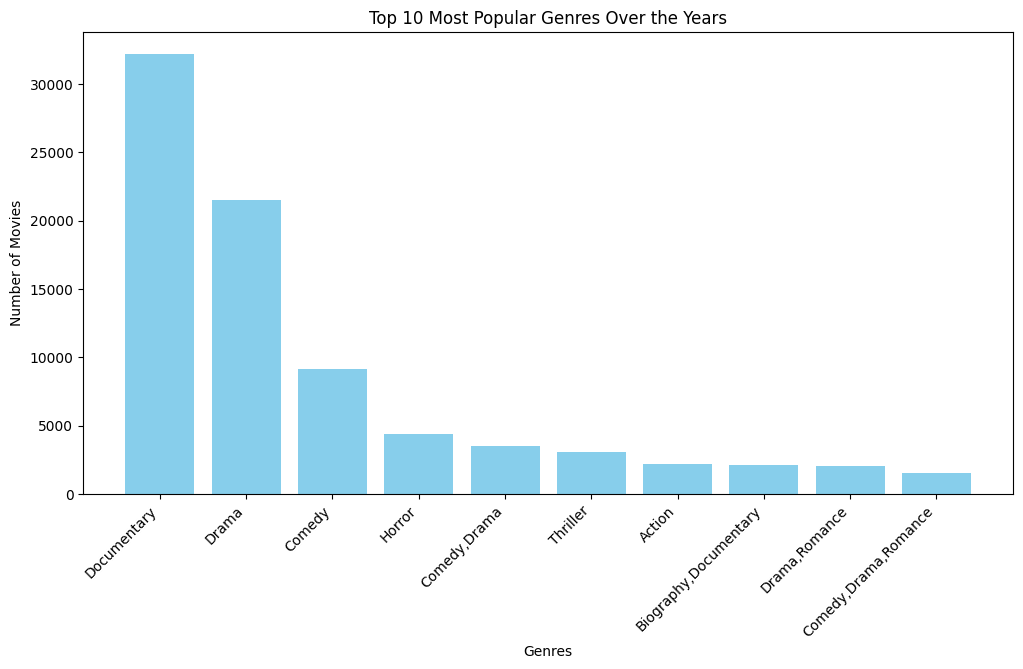

In [67]:
import matplotlib.pyplot as plt

# Assuming you have already executed the genres_query
# Display the top 10 most popular genres
top_genres = genres_data.dropna(subset=['genres']).sort_values(by='movie_count', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(top_genres['genres'], top_genres['movie_count'], color='skyblue')
plt.title('Top 10 Most Popular Genres Over the Years')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()


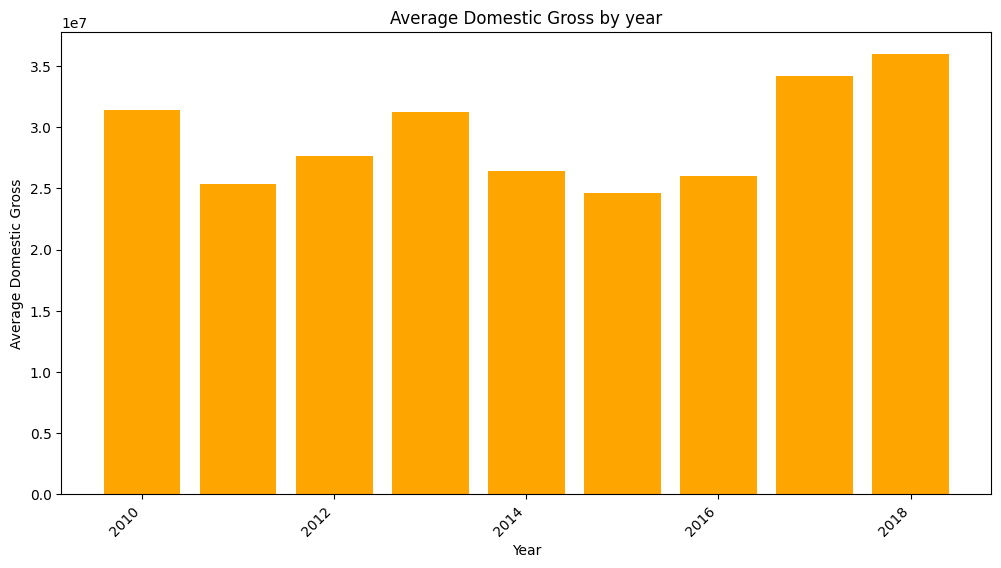

In [75]:
# Example SQL query to retrieve box office data
box_office_query = """
SELECT year, AVG(domestic_gross) as avg_domestic_gross
FROM bom
GROUP BY year;
"""

box_office_data = pd.read_sql(box_office_query, conn)

# Bar chart for box office data
plt.figure(figsize=(12, 6))
plt.bar(box_office_data['year'], box_office_data['avg_domestic_gross'], color='orange')
plt.title('Average Domestic Gross by year')
plt.xlabel('Year')
plt.ylabel('Average Domestic Gross')
plt.xticks(rotation=45, ha='right')
plt.show()


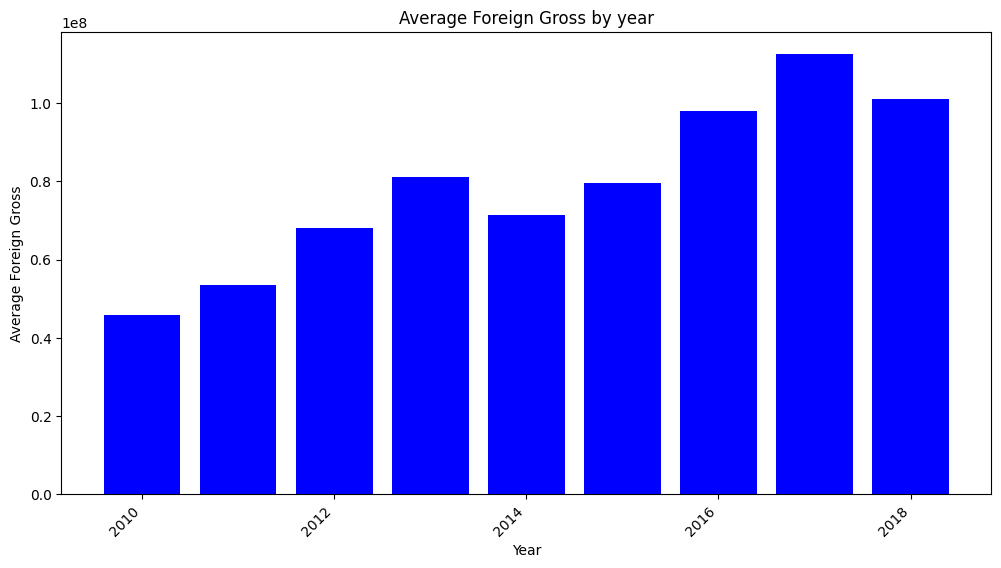

In [74]:
# Example SQL query to retrieve box office data
box_office_query = """
SELECT year, AVG(foreign_gross) as avg_foreign_gross
FROM bom
GROUP BY year;
"""

box_office_data = pd.read_sql(box_office_query, conn)

# Bar chart for box office data
plt.figure(figsize=(12, 6))
plt.bar(box_office_data['year'], box_office_data['avg_foreign_gross'], color='blue')
plt.title('Average Foreign Gross by year')
plt.xlabel('Year')
plt.ylabel('Average Foreign Gross')
plt.xticks(rotation=45, ha='right')
plt.show()

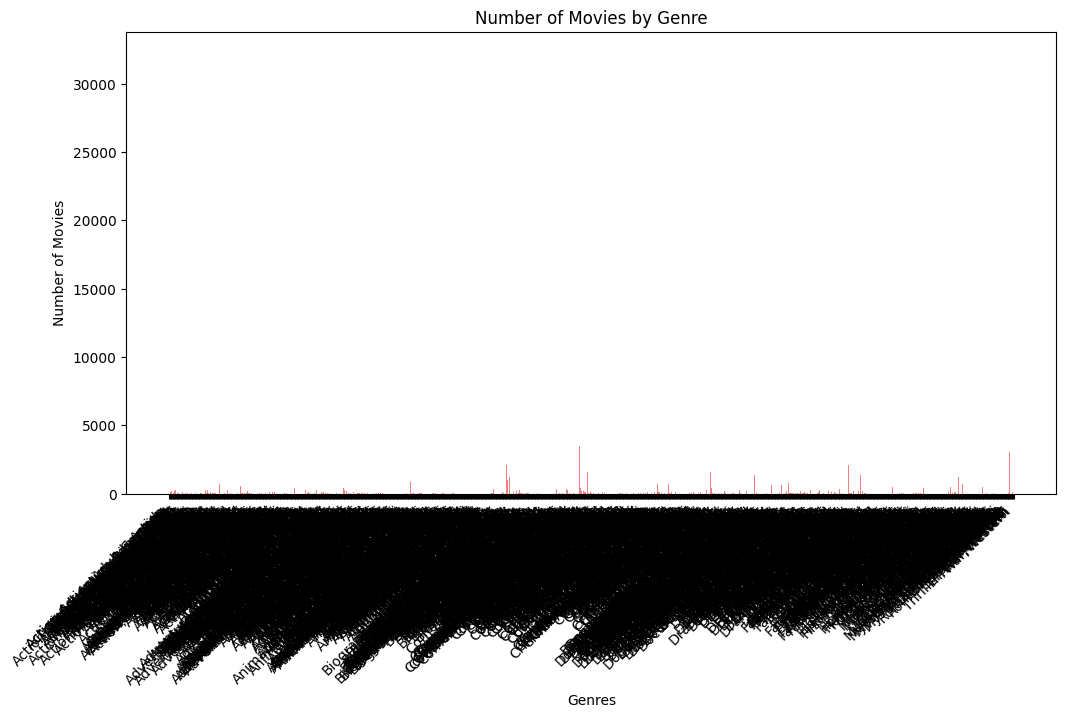

In [80]:
# SQL query and bar chart for genre combinations
combinations_query = """
SELECT genres, COUNT(*) as movie_count
FROM movie_basics
WHERE genres IS NOT NULL
GROUP BY genres;
"""

combinations_data = pd.read_sql(combinations_query, conn)

plt.figure(figsize=(12, 6))
plt.bar(combinations_data['genres'], combinations_data['movie_count'], color='lightcoral')
plt.title('Number of Movies by Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()


In [83]:
import pandas as pd

# Name the file path
file_path = 'bom.movie_gross.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the entire DataFrame
print(data)

# Or display the first few rows using the head() method
print(data.head(20))


                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


## Data Cleaning

In [85]:
# Clean the DataFrame by removing rows with null values
cleaned_data = data.dropna()
# Display the cleaned DataFrame
print(cleaned_data.head(5))

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


## Data Viz Again

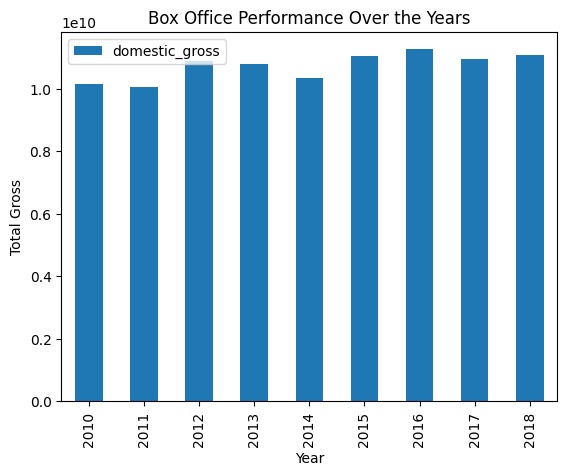

In [86]:
# Total domestic and foreign gross over the years
total_gross_over_years = df.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

# Plotting
total_gross_over_years.plot(kind='bar', stacked=True)
plt.title('Box Office Performance Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.show()


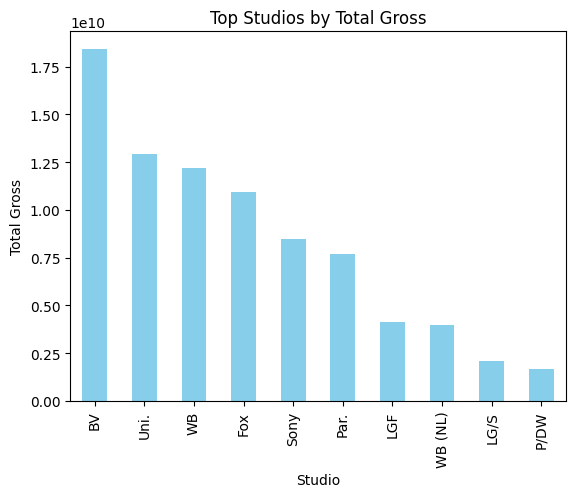

In [88]:
# Total gross by studio
studio_total_gross = df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10)

# Plotting
studio_total_gross.plot(kind='bar', color='skyblue')
plt.title('Top Studios by Total Gross')
plt.xlabel('Studio')
plt.ylabel('Total Gross')
plt.show()


domestic_gross    float64
foreign_gross     float64
dtype: object
domestic_gross    float64
foreign_gross     float64
dtype: object


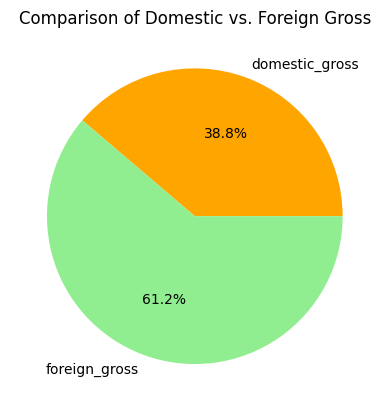

In [130]:
import matplotlib.pyplot as plt

# Check data types of 'domestic_gross' and 'foreign_gross' columns
print(df[['domestic_gross', 'foreign_gross']].dtypes)

# Convert columns to numeric if needed
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'], errors='coerce')
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Check again after conversion
print(df[['domestic_gross', 'foreign_gross']].dtypes)

# Total domestic vs. foreign gross
total_gross_comparison = df[['domestic_gross', 'foreign_gross']].sum()

# Plotting
total_gross_comparison.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'lightgreen'])
plt.title('Comparison of Domestic vs. Foreign Gross')
plt.show()


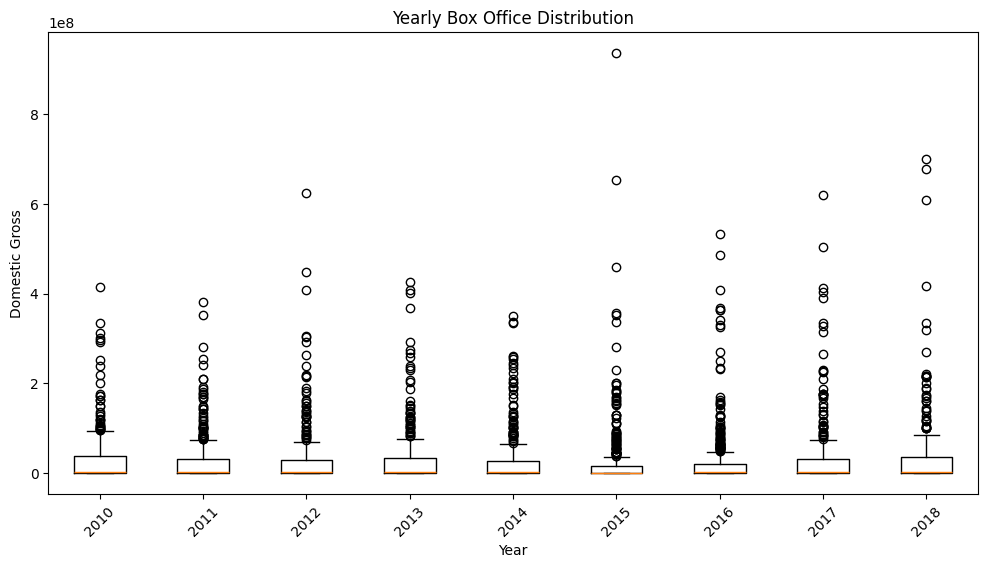

In [93]:
import matplotlib.pyplot as plt

# Box plot for yearly distribution
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['year'] == year]['domestic_gross'].dropna() for year in df['year'].unique()],
            labels=df['year'].unique())
plt.title('Yearly Box Office Distribution')
plt.xlabel('Year')
plt.ylabel('Domestic Gross')
plt.xticks(rotation=45)
plt.show()


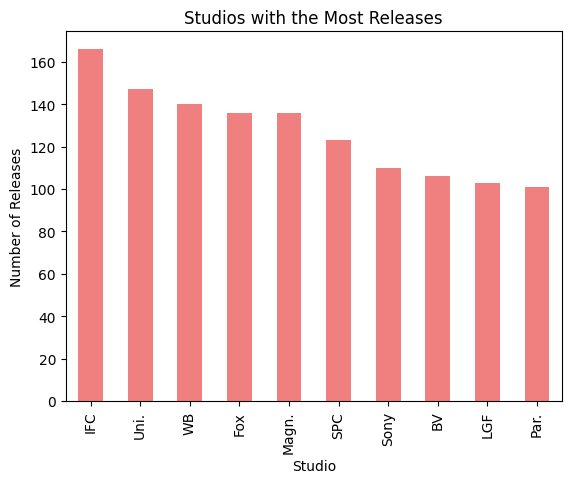

In [94]:
# Number of releases by studio
studio_movie_count = df['studio'].value_counts().head(10)

# Plotting
studio_movie_count.plot(kind='bar', color='lightcoral')
plt.title('Studios with the Most Releases')
plt.xlabel('Studio')
plt.ylabel('Number of Releases')
plt.show()


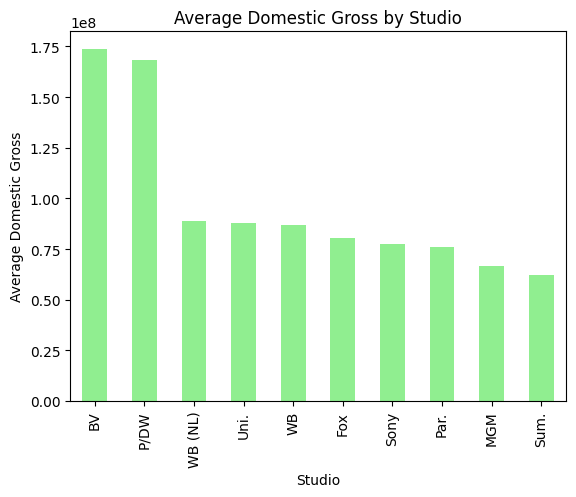

In [95]:
# Average domestic gross by studio
studio_avg_gross = df.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False).head(10)

# Plotting
studio_avg_gross.plot(kind='bar', color='lightgreen')
plt.title('Average Domestic Gross by Studio')
plt.xlabel('Studio')
plt.ylabel('Average Domestic Gross')
plt.show()


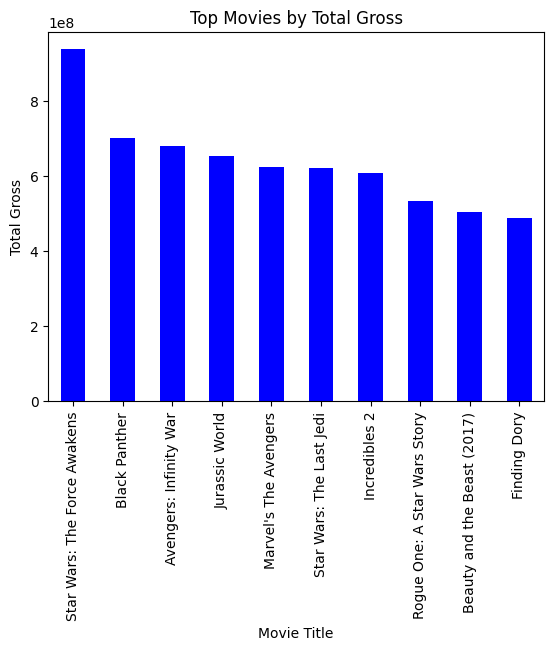

In [97]:
# Top movies by total gross
top_movies = df.groupby('title')['domestic_gross'].sum().sort_values(ascending=False).head(10)

# Plotting
top_movies.plot(kind='bar', color='blue')
plt.title('Top Movies by Total Gross')
plt.xlabel('Movie Title')
plt.ylabel('Total Gross')
plt.show()
